<a href="https://colab.research.google.com/github/Staffilon/KestraDataOrchestrator/blob/main/T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd "gdrive/MyDrive/Dati-TBDM/refined_data"

/content/gdrive/.shortcut-targets-by-id/1xGTanGyuk-TCLCMoGz5VNG7sUEscVC-Z/Dati-TBDM/refined_data


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
energy_df = pd.read_csv("modified_energy_data.csv")
fermate_df = pd.read_csv("modified_fermate_data.csv")
merged_data_df = pd.read_csv("energy_fermate_merged.csv")

In [5]:
# Calculate the average energy consumption for each machine (channel)
average_consumption = energy_df.groupby('channel')['Ea_Imp'].mean()

# Print the results
print(average_consumption)

channel
108      12.850461
110     798.777596
301     702.691234
302     742.613017
303     667.007712
304     590.506193
305     449.275889
306     949.879441
307     471.107374
308     547.899759
309     738.324873
310     579.242719
313    1001.145456
314     508.138316
315     616.054741
319     809.864619
515    3769.373928
610    5618.905493
611     894.940427
612    1015.888721
614    5040.419542
618     831.039977
Name: Ea_Imp, dtype: float64


In [6]:
# Filter out rows where Energy_Value is null
merged_data_df = merged_data_df[merged_data_df['Energy_Value'].notna()]

# Calculate the average energy consumption for each machine (RESOURCE column)
new_average_consumption = merged_data_df.groupby('RESOURCE')['Energy_Value'].mean()


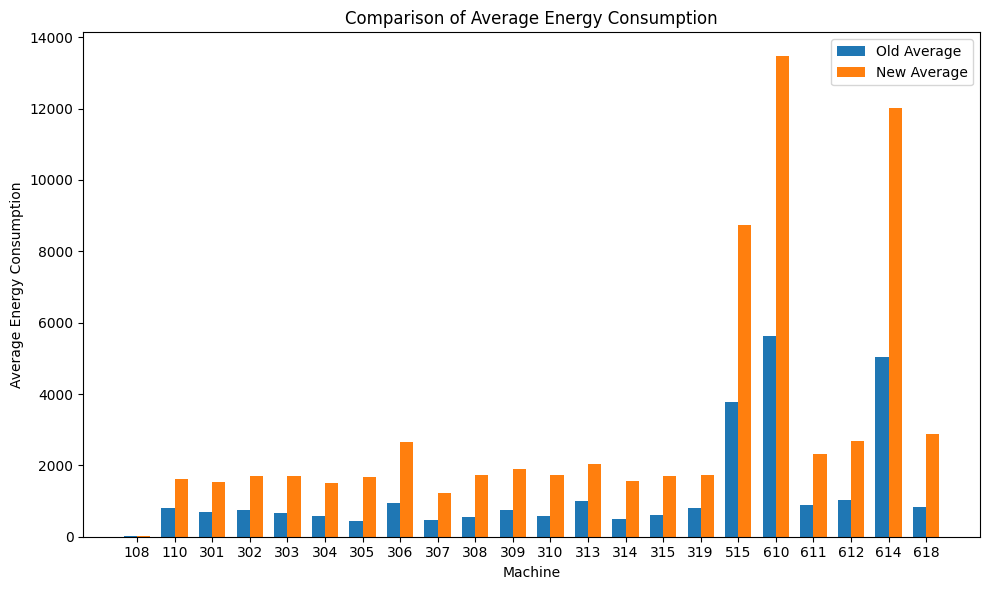

In [8]:
# Combine the two sets of averages for comparison
combined_averages = pd.DataFrame({
    'Old_Average': average_consumption,
    'New_Average': new_average_consumption
})

# Reset index to get 'channel' or 'RESOURCE' as a column
combined_averages.reset_index(inplace=True)

# Plotting the graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(combined_averages))

plt.bar(index, combined_averages['Old_Average'], bar_width, label='Old Average')
plt.bar([i + bar_width for i in index], combined_averages['New_Average'], bar_width, label='New Average')

plt.xlabel('Machine')
plt.ylabel('Average Energy Consumption')
plt.title('Comparison of Average Energy Consumption')
plt.xticks([i + bar_width / 2 for i in index], combined_averages['index'])
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
from scipy import stats

# Independent t-test
t_stat, p_value = stats.ttest_ind(combined_averages['Old_Average'], combined_averages['New_Average'], nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two sets of averages.")
else:
    print("There is no significant difference between the two sets of averages.")


T-statistic: -2.281232016409947, P-value: 0.027670004000734216
There is a significant difference between the two sets of averages.


In [10]:
# Related t-test

t_stat, p_value = stats.ttest_rel(combined_averages['Old_Average'], combined_averages['New_Average'], nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two sets of averages.")
else:
    print("There is no significant difference between the two sets of averages.")

T-statistic: -4.303034163635538, P-value: 0.00031480066717622476
There is a significant difference between the two sets of averages.
